# MVD 7. cvičení

## 1. část - Vytvoření dat

V dnešním cvičení je před implementací shlukování potřeba vygenerovat vlastní data. Cílem je vytvořit několik datasetů dle předlohy a vizualizovat je. Postačí dosažení podobného pozice a rozložení bodů.

### 1. dataset - 2 třídy, 100 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset1.png)

Připravený dataset pro další úlohu (k-means) může vypadat například takto:
![prepared](expected_outputs/prepared_dataset.png)

In [274]:
from sklearn.datasets import make_blobs
import plotly.express as px
import pandas as pd

In [275]:
def make_clusters(centers, n_data_points, center_box=(-10.0, 10.0)):
    blobs = make_blobs(n_data_points, centers=centers, center_box=center_box)
    x = blobs[0][:, 0]
    y = blobs[0][:, 1]
    labels = blobs[1]

    df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
    df.label = df.label.apply(str)

    return df

In [276]:
df = make_clusters(centers=[(0, 0), (0, 10)], n_data_points=100)

fig = px.scatter(df, x='x', y='y', color='label')
fig.show()

### 2. dataset - 4 třídy, 200 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset2.png)

In [277]:
df = make_clusters(centers=[(0, 0), (0, 10), (10, 10), (10, 0)], n_data_points=200)

fig = px.scatter(df, x='x', y='y', color='label')
fig.show()

### 3. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_moons``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).

![dataset1](expected_outputs/dataset3.png)

In [278]:
from sklearn.datasets import make_moons

In [279]:
moons = make_moons(200, noise=.03)
x = moons[0][:, 0]
y = moons[0][:, 1]
labels = moons[1]

df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
df.label = df.label.apply(str)

fig = px.scatter(df, x='x', y='y', color='label')
fig.show()

### 4. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_circles``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

![dataset1](expected_outputs/dataset4.png)

In [280]:
from sklearn.datasets import make_circles

In [281]:
moons = make_circles(200, noise=.03, factor=.1)
x = moons[0][:, 0]
y = moons[0][:, 1]
labels = moons[1]

df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
df.label = df.label.apply(str)

fig = px.scatter(df, x='x', y='y', color='label')
fig.show()

## 2. část - K-means

Implementujte K-means algoritmus, aplikujte ho na všechny 4 datasety a zobrazte výsledky algoritmu. Zároveň se pokuste zvýraznit centroid ve vizualizaci výsledku. Pro aplikaci K-means můžete použít počet tříd v každém datasetu (není třeba hledat parametr K automaticky).

In [282]:
import numpy as np

In [283]:
#def knn(X, centroids):
#    dist = np.zeros((X.shape[0], len(centroids)))
#    for i, centroid in enumerate(centroids):
#        dist[i, :] = np.sum((centroid[None] - X[i, :]) ** 2, axis=1).T
#
#    return dist

In [284]:
def compute_knn(X, centroids):
    knn = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        knn[:, i] = np.sqrt(np.sum((X - centroid[None]) ** 2, axis=1))
    return knn

In [285]:
def label_points(X, centroids):
    knn = compute_knn(X, centroids)

    return knn.argmin(axis=1)

In [286]:
def init_centroids(X, n_clusters):
    centroids = []
    for i in range(n_clusters):
        if i == 0:
            index = np.random.randint(low=0, high=len(X))
            centroids.append(X[index, :])
            continue

        # take the furthest point from all centroids
        knn = compute_knn(X, centroids)
        mean_distances = np.mean(knn, axis=1)
        centroid_idx = mean_distances.argmax()
        new_centroid = X[centroid_idx, :]

        nth_idx = -2
        while all(np.isin(np.array(new_centroid[None]), centroids).ravel()):
            centroid_idx = np.argpartition(mean_distances, nth_idx)[nth_idx]
            new_centroid = X[centroid_idx, :]
            nth_idx -= 1

        centroids.append(X[centroid_idx, :])

    return centroids

In [287]:
def init_centroids_2(X, n_clusters):
    centroids = []

    index = np.random.randint(low=0, high=len(X))
    centroids.append(X[index, :])

    knn = compute_knn(X, centroids)
    mean_distances = np.mean(knn, axis=1)
    indices = ((X.shape[0] // (np.arange(n_clusters - 1) + 1)) - 1)
    if len(indices) == 0:
        return centroids

    centroid_indices = np.argsort(mean_distances)[indices]
    for centroid_idx in centroid_indices:
        new_centroid = X[centroid_idx, :]
        centroids.append(new_centroid)


    return centroids

In [288]:
def kmeans(X, n_clusters, n_iterations):
    centroids = init_centroids(X, n_clusters)

    for _ in range(n_iterations):
        labels = label_points(X, centroids)

        new_centroids = []
        for i in range(n_clusters):
            new_centroid = np.median(X[labels == i, :], axis=0)

            #if np.isnan(np.sum(new_centroid)):
            #    new_centroid = centroids[i]

            new_centroids.append(new_centroid)

        centroids = new_centroids

    return centroids

In [289]:
def display_clusters(X, centroids):
    labels = label_points(X, centroids).astype('str')
    X = np.vstack([X, np.array(centroids)])
    labels = np.hstack([labels, np.array(['centroid'] * len(centroids))]).T

    df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels})

    fig = px.scatter(df, x='x', y='y', color='label')
    fig.show()

In [290]:
centers_25 = []
for i in range(5):
    for k in range(5):
        centers_25.append((i * 10, k * 10))

datasets = [
    (
        make_clusters(centers=[(0, 0), (0, 10)], n_data_points=100)[['x', 'y']].to_numpy(),
        2,
    ),
    (
        make_clusters(centers=[(0, 0), (0, 10), (10, 10), (10, 0)], n_data_points=200)[['x', 'y']].to_numpy(),
        4,
    ),
    (
        make_clusters(centers=centers_25, n_data_points=1000)[['x', 'y']].to_numpy(),
        25,
    ),
    (
        make_moons(200, noise=.03)[0],
        2,
    ),
    (
        make_circles(200, noise=.03, factor=.1)[0],
        2,
    ),
]

In [291]:
import matplotlib.pyplot as plt

def find_k(X, max_n_clusters):
    scores = np.zeros((max_n_clusters, 1))
    for k in range(1, max_n_clusters + 1):
        centroids = kmeans(X, n_clusters=k, n_iterations=10)
        while np.isnan(np.sum(centroids)):
            # try again more time
            centroids = kmeans(X, n_clusters=k, n_iterations=10)

        knn = compute_knn(X, centroids)
        score = np.mean(np.min(knn, axis=1))

        scores[k - 1] = score


    plt.plot(scores)
    plt.show()

    #print(scores)

    # find elbow using 2 gradings (convex curve)
    diffs_2 = np.nan_to_num(np.diff(np.diff(scores.ravel())), nan=0)

    return diffs_2.argmax(axis=0) + 2

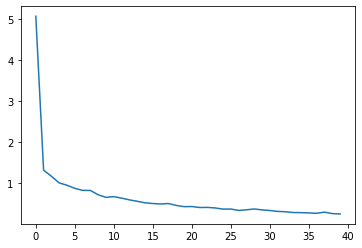

expected_k=2, actual_k=2, correct=True


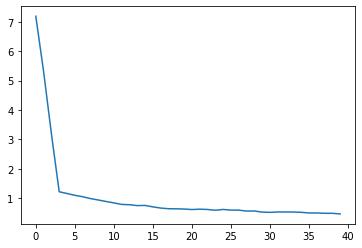

expected_k=4, actual_k=4, correct=True


/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide



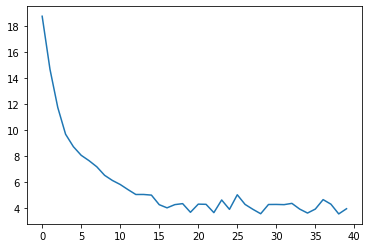

expected_k=25, actual_k=25, correct=True


/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide



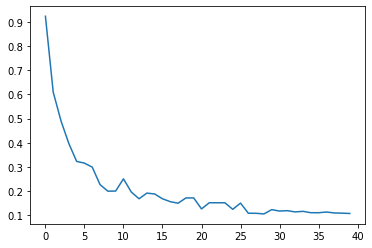

expected_k=2, actual_k=2, correct=True


/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/Users/admin/opt/anaconda3/envs/MVD_2021/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide



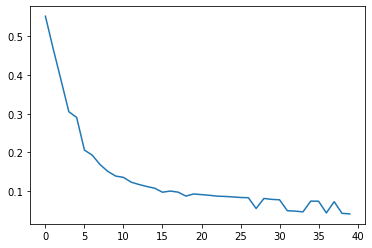

expected_k=2, actual_k=6, correct=False


In [292]:
for X, n_clusters in datasets:
    k = find_k(X, max_n_clusters=40)

    print(f'expected_k={n_clusters}, actual_k={k}, correct={n_clusters == k}')

    centroids = kmeans(X, n_clusters=k, n_iterations=10)
    display_clusters(X, centroids)

## Bonus - K-means s nalezenou hodnotou K

Zkuste najít algoritmy, které umožňují hledat hodnotu K pro K-means. Implementujte alespoň jeden z nich a ověřte, že funguje. Ověření proveďte nejen na našich předchozích datasetech, ale zkuste si vygenerovat i dataset s větším množstvím tříd (10-20). (1 bod)

Za implementaci více algoritmů, případně za hlubší analýzu výsledků je možné získat ještě jeden bonusový bod.